In [52]:
import csv
import pandas as pd
import numpy as np
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

from dataset import load_species
from dataset import df_to_file
from dataset import clean_file

# Global Variables
data_file = "data\EUForestspecies.csv"
location_data = "../models/test.csv"
fp = "../data/borders/Europe_borders.shp"
tree_data = "../models/abiesAlba.csv"
inCoords = "'espg:3035'"
outCoords = "'espg:4326'"

In [53]:
border_data = gpd.read_file(fp)

<AxesSubplot:>

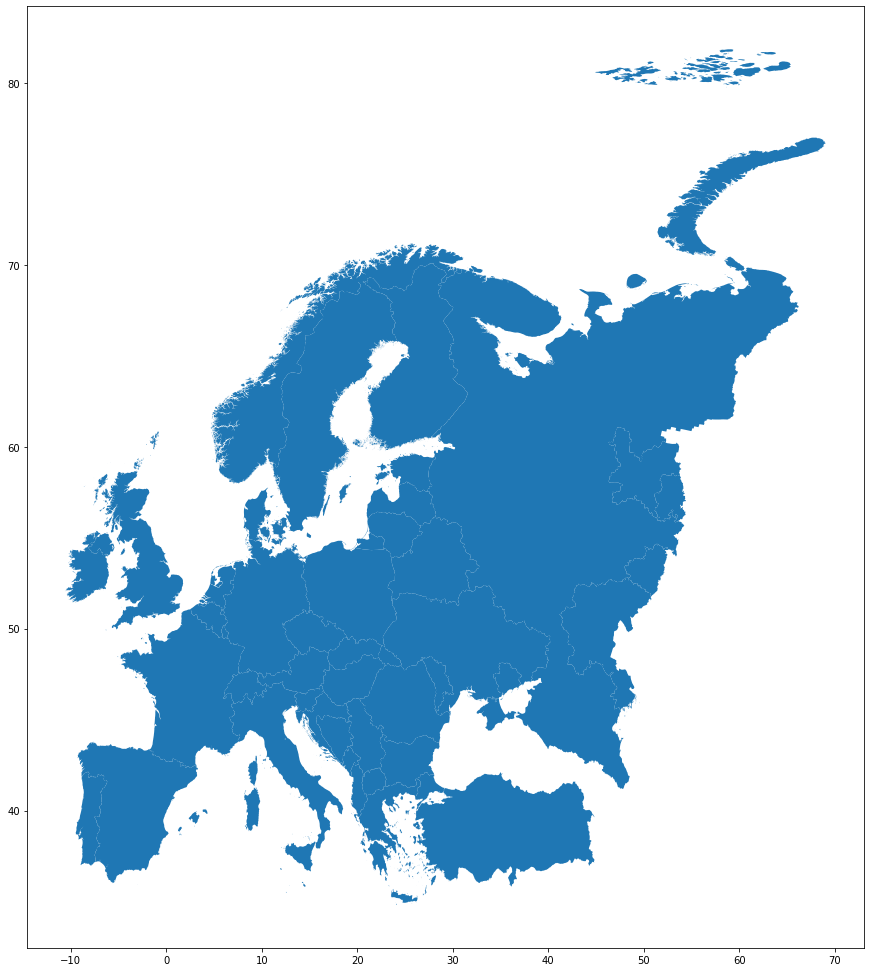

In [54]:
fig, ax = plt.subplots(figsize = (15,50))
border_data.plot(ax = ax)

In [55]:
df = pd.read_csv(tree_data)
crs = {'init': 'espg:4326'}
df.head()

,X,Y,COUNTRY,SPECIES NAME,"""DBH-1""",DBH-2,NFI,FF,BS
0,47.183876,9.795662,Austria,Abies alba,-9999,-9999,-9999,1,-9999
1,47.410551,13.384315,Austria,Abies alba,1,1,1,-9999,-9999
2,47.556834,13.314133,Austria,Abies alba,1,1,1,-9999,-9999
3,47.084708,9.730257,Austria,Abies alba,-9999,1,1,-9999,-9999
4,48.348032,13.906099,Austria,Abies alba,-9999,1,1,-9999,-9999


In [56]:
geometry = [Point(xy) for xy in zip( df["X"], df["Y"])]
geometry[:3]

In [57]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

c:\Users\anarv\anaconda3\envs\MyEnviroment\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CRSError: Invalid projection: +init=espg:4326 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=espg:4326 +type=crs)

In [ ]:
fig, ax = plt.subplots(15,50)
border_data.plot(ax =ax, alpha = .4, color = "grey")
geo_df[geo_df['DBH-1'] == 1].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "> 120")
geo_df[geo_df['DBH-1'] != 1].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "< 120")
